In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import glob
import numpy as np


In [2]:
def plot_1D(df, var, ax):

    try:
        df[var].dropna(dim="ind_t").plot(ax=ax,cmap="bone")
        ax.set_title(f"{var} for #{str(df["FDM_point_index"].values)}")
    except Exception as e:
        print(f"Unable to print 1D plot because {e}")
        

def plot_2D(df, var, ax):

    try:

        df[var].dropna(dim="ind_t").plot(ax=ax,cmap="bone")
        ax.set_title(f"{var} for #{str(df["FDM_point_index"].values)} (2D)")
    except Exception as e:
        print(f"Unable to print 2D plot because {e}")

def plot_2Ddetail(df, var, ax):

    try:
        df = df.assign_coords({"depth":df['depth']})
        df = df.swap_dims({"layer":"depth"})
        df[var].dropna(dim="ind_t").plot(ax=ax,cmap="bone")
        
        plt.gca().invert_yaxis()
    except Exception as e:
        print(f"Unable to print 2Ddetail plot because {e}")

def plot_FDM_output(output_dir, point="random", output_type="1D", var="dens"):
    """
    output_dir (str): location of output files
    point (str or int) "random" or int defining which point to plot
    output_type (str): "1D", "2D", "2Ddetail", "both2D"; defines which datasets to load and plot
    var (str): depends on which dataset you are loading
    """

    path_len_1D = len(f"{output_dir}+FGRN055_era055_1D_")

    if type(point) is str:
        
        files_1D = [f for f in glob.glob(output_dir+"*1D*")]
        index = np.random.randint(len(files_1D))
        point = files_1D[index][path_len_1D-1:-3]
        print(f"Using random point # {point}")
        
    match output_type:

        case "1D":
            figure, ax = plt.subplots(1,1,figsize=(5,5))

            ds_1D = xr.load_dataset(f"{output_dir}FGRN055_era055_1D_{str(point)}.nc")
            ds_1D["FDM_point_index"] = str(point)
            plot_1D(ds_1D, var, ax)
            
        case "2D":
            figure, ax = plt.subplots(1,1,figsize=(5,5))

            ds_2D = xr.load_dataset(f"{output_dir}FGRN055_era055_2D_{str(point)}.nc")
            ds_2D["FDM_point_index"] = str(point)
            plot_2D(ds_2D, var, ax)

        case "2Ddetail":
            figure, ax = plt.subplots(1,1,figsize=(5,5))

            ds_2Ddet = xr.load_dataset(f"{output_dir}FGRN055_era055_2Ddetail_{str(point)}.nc")
            ds_2Ddet["FDM_point_index"] = str(point)
            plot_2Ddetail(ds_2Ddet, var, ax)

        case "both2D":
            figure, ax = plt.subplots(1,2,figsize=(10,5))

            ds_2D = xr.load_dataset(f"{output_dir}FGRN055_era055_2D_{str(point)}.nc")
            ds_2D["FDM_point_index"] = str(point)
            plot_2D(ds_2D, var, ax[0])

            ds_2Ddet = xr.load_dataset(f"{output_dir}FGRN055_era055_2Ddetail_{str(point)}.nc")
            ds_2Ddet["FDM_point_index"] = str(point)
            plot_2Ddetail(ds_2Ddet, var, ax[1])

            plt.tight_layout()

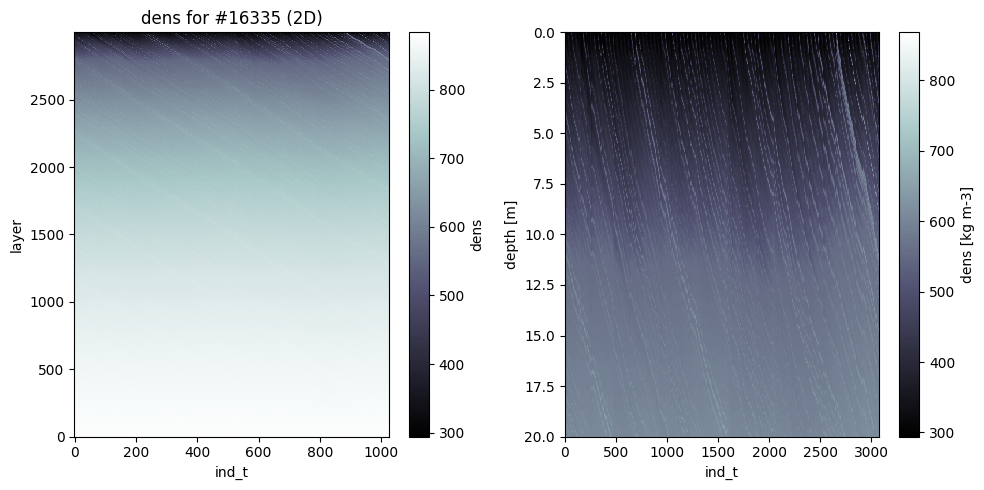

In [4]:
#project_name="FGRN055-era055_interim_MO_fit_1939-2023"
point = np.random.randint(58265)
project_name="run_FGRN055-era055_1939-2023"
output_dir = f"/ec/res4/scratch/nld4814/{project_name}/output/"
plot_FDM_output(output_dir, point=16335, output_type="both2D", var="dens")

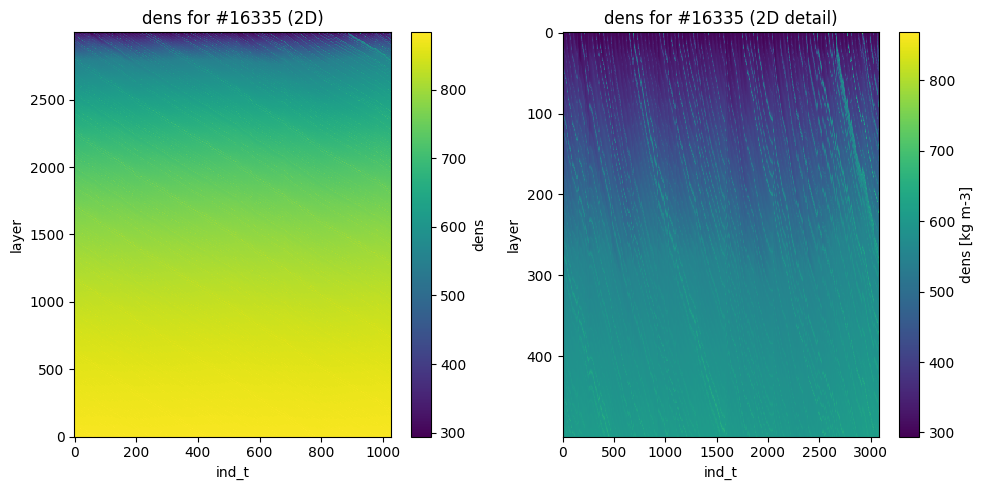

In [53]:
project_name="run_FGRN055-era055_1939-2023"
output_dir = f"/ec/res4/scratch/nld4814/{project_name}/output/"
plot_FDM_output(output_dir, point=16335, output_type="both2D", var="dens")

In [ ]:
files_1D = [f for f in glob.glob(output_dir+"*1D*")]
path_len_1D = len(f"{output_dir}+FGRN055_era055_1D_")

index = np.random.randint(len(files_1D))
point = files_1D[index][path_len_1D-1:-3]
ds_1D = xr.load_dataset(files_1D[index])
ds_2D = xr.load_dataset(f"{output_dir}FGRN055_era055_2D_{point}.nc")
ds_2Ddet = xr.load_dataset(f"{output_dir}FGRN055_era055_2Ddetail_{point}.nc")


In [98]:
ds_2Ddet

<xarray.Dataset> Size: 26MB
Dimensions:   (layer: 500, ind_t: 3216)
Dimensions without coordinates: layer, ind_t
Data variables:
    dens      (layer, ind_t) float32 6MB 384.3 375.1 353.0 346.9 ... nan nan nan
    temp      (layer, ind_t) float32 6MB 259.1 253.9 254.1 254.5 ... nan nan nan
    lwc       (layer, ind_t) float32 6MB 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan
    depth     (layer) float32 2kB 0.02 0.06 0.1 0.14 ... 19.86 19.9 19.94 19.98
    dz        (layer) float32 2kB 0.04 0.04 0.04 0.04 ... 0.04 0.04 0.04 0.04
    refreeze  (layer, ind_t) float32 6MB 0.002088 0.0 ... 9.969e+36 9.969e+36

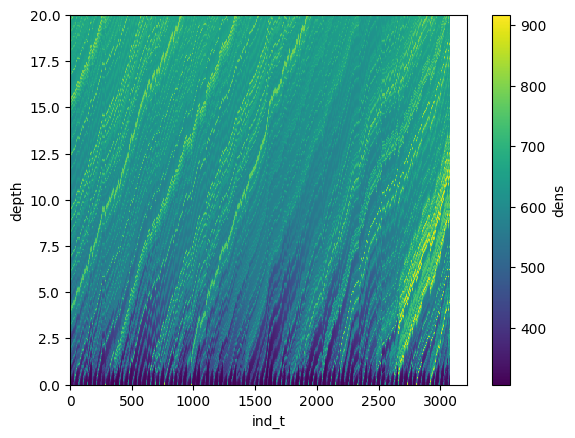

In [94]:
ds_2Ddet.assign_coords({"depth":ds_2Ddet['depth']})
ds_2Ddet.swap_dims({"layer":"depth"}).dens.plot()

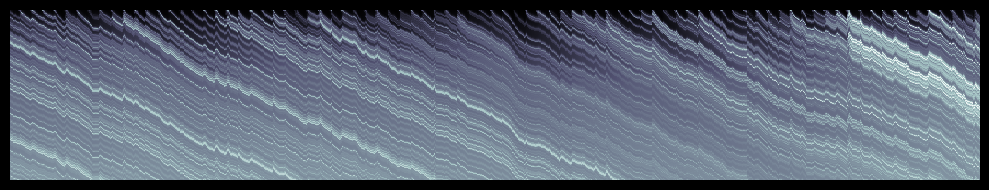

In [86]:
var="dens"
fig = plt.figure(figsize=(10,2))
fig.patch.set_facecolor('k')
ds_2Ddet.dropna(dim="ind_t").dens.plot(cmap="bone", add_colorbar=False)
plt.gca().invert_yaxis()
plt.axis("off")

plt.tight_layout()

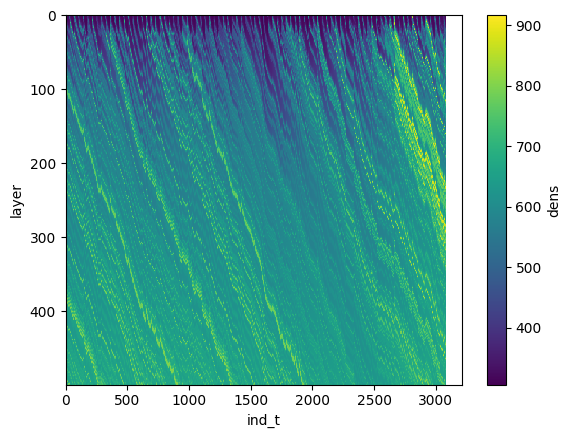

In [37]:
project_name="FGRN055-era055_interim_MO_fit_1939-2023"
output_dir = f"/ec/res4/scratch/nld4814/{project_name}/output/"
files_1D = [f for f in glob.glob(output_dir+"*1D*")]

path_len_1D = len(f"{output_dir}+FGRN055_era055_1D_")

index = np.random.randint(len(files_1D))
point = files_1D[index][path_len_1D-1:-3]
ds_1D = xr.load_dataset(files_1D[index])
ds_2D = xr.load_dataset(f"{output_dir}FGRN055_era055_2D_{point}.nc")
ds_2Ddet = xr.load_dataset(f"{output_dir}FGRN055_era055_2Ddetail_{point}.nc")

ds_2Ddet.dens.plot()
plt.gca().invert_yaxis()